In [1]:
import numpy as np
import seaborn as sns
import rasterio as rs
import hickle as hkl

In [22]:
from skimage.transform import resize

tile = '9105X1863Y'

train_tif = f"train/october/{tile}_FINAL.tif"
bad = f"train/october/{tile}_FINAL.tif"
y = rs.open(train_tif).read(1).astype(np.float32)  / 100
bad = rs.open(bad).read(1).astype(np.float32) / 100
y = resize(y, bad.shape, 0)
#bad = bad > 0.1
y = y.astype(np.float32)
y2 = np.copy(y)
#y = y * bad
ard = "../../src/train_sample.hkl"
max_y = 1.
n_samples =60
n_tries = 60

year = 'canada2'
x = hkl.load(ard)
#y = np.ones_like(x[0, ..., 0])
y[y < 0.75] = 0.
#y[y >= 0.75] = 1.
#y = y ** 1.25
#y[y > 0.4] = 0.95

##### sns.heatmap(y)

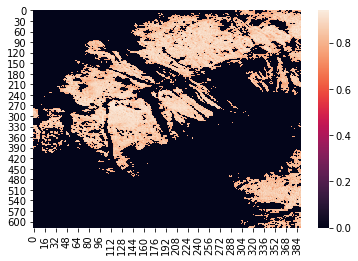

In [23]:
sns.heatmap(y)

In [24]:
y.shape

(618, 390)

In [55]:
min_y = 20
max_y = y.shape[0] - 120
min_x = 20
max_x = y.shape[1] - 20

y2 = np.copy(y)

x_samples = np.random.randint(min_x, max_x, n_tries)
y_samples = np.random.randint(min_y, max_y, n_tries)

ys = []
xs = []

for xpx, ypx in zip(x_samples, y_samples):
    yi = y[ypx-7:ypx+7, xpx-7:xpx+7]
    bi = bad[ypx-7:ypx+7, xpx-7:xpx+7]
    #if (np.mean((yi) <= 0.5) >= 0.00) and (np.mean(yi >= 0.5) > 0.25):
    #if np.mean((yi - bi) > 0.5) > 0.7:
    if (np.mean(yi > 0.2) >= 0.0) and (np.mean(yi < 0.3) >= 0):
        xi = x[:, ypx-14:ypx+14, xpx-14:xpx+14, :]
        if (xi.shape[1] == 28) and (xi.shape[2] == 28):
            ys.append(yi[np.newaxis])
            xs.append(xi[np.newaxis])
            y2[ypx-7:ypx+7, xpx-7:xpx+7] = 3.

ys = np.concatenate(ys, axis = 0)
xs = np.concatenate(xs, axis = 0)
#ys = ys ** 0.3

(60, 14, 14)


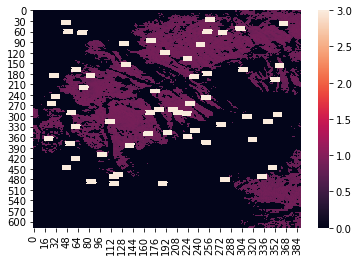

In [56]:
sns.heatmap(y2)
print(ys.shape)

In [57]:
np.mean(ys)

0.28123808

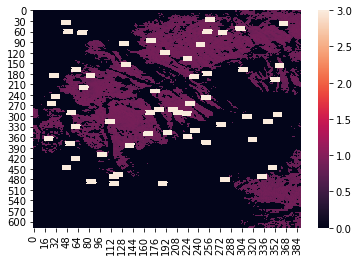

In [58]:
#ys = ys[:20]
#xs = xs[:20]
year = 'canada2'
np.save(f"y_{year}.npy", ys[:50])
np.save(f"x_{year}.npy", xs[:50])
sns.heatmap(y2)

In [62]:
year = 'canada'

xs = []
ys = []
ends = [50, 40, 60]
for i in range(1, 3):
    x = np.load(f'x_canada{str(i)}.npy', allow_pickle = True)#[:ends[i]]
    y = np.load(f'y_canada{str(i)}.npy', allow_pickle = True)#[:ends[i]]
    print(x.shape, y.shape)
    xs.append(x[:ends[i]])
    ys.append(y[:ends[i]])
    
        

xs = np.concatenate(xs, axis = 0)
ys = np.concatenate(ys, axis = 0)
np.save(f"y_{year}-all.npy", ys)
np.save(f"x_{year}-all.npy", xs)
#x3 = x3[62:]
#y3 = y3[62:]
print(ys.shape, ys.shape)
#np.save(f"y_{year}.npy", ys)
#np.save(f"x_{year}.npy", xs)

(50, 12, 28, 28, 17) (50, 14, 14)
(50, 12, 28, 28, 17) (50, 14, 14)
(90, 14, 14) (90, 14, 14)


In [10]:
np.mean(xs[45], axis = (0, 1, 2))

array([0.04831878, 0.07188261, 0.09065511, 0.24224024, 0.13378447,
       0.19752969, 0.2272265 , 0.26190042, 0.27682275, 0.17668565,
       0.07041333, 0.6066318 , 0.32971635, 0.27558616, 0.08991393,
       0.25165638, 0.22956191], dtype=float32)

In [11]:
np.mean(xs[44], axis = (0, 1, 2))

array([0.04306386, 0.064793  , 0.07831123, 0.23217636, 0.12255476,
       0.18915121, 0.21849115, 0.25197524, 0.2525602 , 0.15480722,
       0.08380763, 0.60419893, 0.32813177, 0.2875572 , 0.06399839,
       0.2608518 , 0.264294  ], dtype=float32)

In [12]:
np.mean(ys[40:60], axis = (1, 2))

array([0.24183674, 0.8397959 , 0.73418367, 0.53775513, 0.78622454,
       0.1877551 , 0.85357136, 0.55214286, 0.16964288, 0.44122446,
       0.47061223, 0.39219385, 0.4528571 , 0.29336736, 0.30423465,
       0.35750005, 0.2646939 , 0.35622448, 0.46010205, 0.3794388 ],
      dtype=float32)

In [13]:
y1 =np.load("y_guat2-all.npy")
np.mean(y1, axis = (1, 2))

array([0.78061223, 0.9438776 , 0.95408165, 0.8061224 , 0.78061223,
       0.7755102 , 0.77040815, 0.9744898 , 0.81122446, 0.9183673 ,
       0.7653061 , 0.7397959 , 0.9132653 , 0.8469388 , 0.71428573,
       0.9591837 , 0.70408165, 0.72959185, 0.77040815, 0.622449  ,
       0.96938777, 0.9744898 , 0.5969388 , 0.78571427, 0.68367344,
       0.96938777, 0.6683673 , 0.96938777, 0.8214286 , 0.6989796 ,
       0.78056115, 0.5758674 , 0.69943875, 0.72494894, 0.76255095,
       0.6042347 , 0.6231633 , 0.7637245 , 0.7729082 , 0.74663264,
       0.7977552 , 0.61188775, 0.69882655, 0.77678573, 0.6875511 ,
       0.78265303, 0.3365306 , 0.73489803, 0.5056633 , 0.76770407,
       0.6894897 , 0.63178575, 0.6038265 , 0.3839796 , 0.6286735 ,
       0.47852036, 0.31066328, 0.68020403, 0.74224496, 1.        ,
       1.        , 1.        , 0.44066325, 0.64602035, 0.7453571 ,
       0.38918367, 0.5453061 , 0.06811224, 0.46438774, 0.26066327,
       0.3609694 , 0.5991327 , 0.6964286 , 0.5266836 , 0.49505

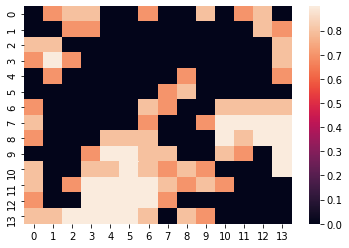

In [14]:
sns.heatmap(ys[12])